# Code Examples from Lecture 13

The following notebook contains examples of Python code for k-means and spectral clustering algorithms.

### Example 1: K-means clustering on user ratings data

In [1]:
import pandas as pd

data = pd.read_csv('ratings.csv',header=None)
data

,0,1,2,3
0,5,5,2,1
1,4,5,3,2
2,4,4,4,3
3,2,2,4,5
4,1,2,3,4
5,2,1,5,5


The example below shows how to apply k-means clustering (with k=2) on the user ratings data. The cluster centroids are also displayed in a dataframe object.

In [2]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=2)
k_means.fit(data) 
centroids = k_means.cluster_centers_
pd.DataFrame(centroids)

,0,1,2,3
0,4.333333,4.666667,3.0,2.000000
1,1.666667,1.666667,4.0,4.666667


The example below shows how to obtain the cluster assignment for each data instance.

In [3]:
labels = k_means.labels_
pd.DataFrame(labels)

,0
0,0
1,0
2,0
3,1
4,1
5,1


The example below shows how to apply the centroids to determine the cluster membership of the new data instances.

In [4]:
testdata = pd.read_csv('ratings2.csv',header=None)
testdata

,0,1,2,3
0,4,5,1,2
1,3,2,4,4
2,2,3,4,1
3,3,2,3,3
4,5,4,1,4


In [5]:
predicted = k_means.predict(testdata)
pd.DataFrame(predicted)

,0
0,0
1,1
2,0
3,1
4,0


The example below shows how to vary the number of clusters (k) and compute the sum-square-error (SSE) for each k. We can then plot the value of SSE against k and use the information to determine the number of clusters in the data.

Text(0,0.5,'SSE')

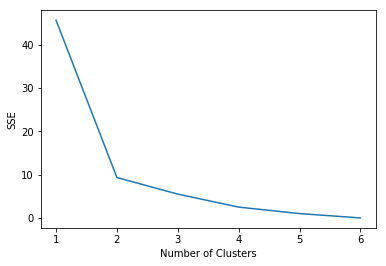

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

sz = [1,2,3,4,5,6]
SSE = []
for numClusters in sz:
    k_means = cluster.KMeans(n_clusters=numClusters)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(sz, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

### Example 2: Spectral Clustering on 2-dimensional Data.

The example below shows a dataset with a well-defined clustering structure. k-means clustering cannot identify the true clusters of the data, but spectral clustering can successfully detect the clusters.

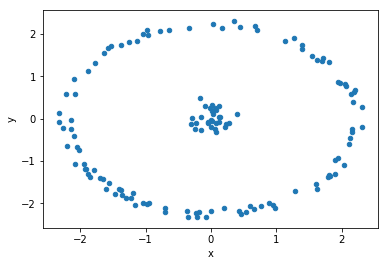

In [7]:
import pandas as pd
%matplotlib inline

data2d = pd.read_csv('2d_data.csv',header=None)
data2d.columns = ['x','y']
data2d.plot(kind='scatter',x='x',y='y')

The example below shows how to apply k-means clustering with k=2 on the 2d data and to display the clustering results.

Text(0.5,1,'K-means clustering')

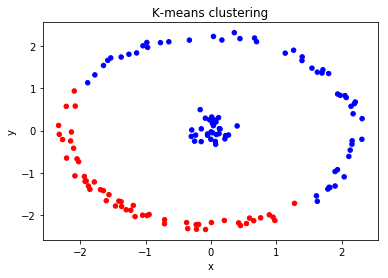

In [8]:
from sklearn import cluster
import pandas as pd

k_means = cluster.KMeans(n_clusters=2)
k_means.fit(data2d)

data2d['clusters'] = pd.Series(k_means.labels_)
col =  data2d.clusters.map({0:'r', 1:'b'})
ax = data2d.plot(kind='scatter',x='x',y='y',c=col)
ax.set_title('K-means clustering')

The example below shows how to apply spectral clustering on the 2-d data and to display the results. Note that there is 1 parameter that must be specified by the user, i.e., gamma. Try varying gamma with the values between 0.1 to 10. See which parameter gives the best results.

Text(0.5,1,'Spectral clustering')

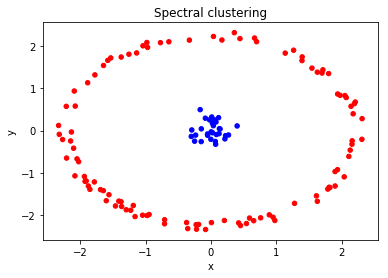

In [9]:
from sklearn import cluster
import pandas as pd

spectral = cluster.SpectralClustering(n_clusters=2,random_state=1,gamma=10)
spectral.fit(data2d)

data2d['clusters'] = pd.Series(spectral.labels_)
col =  data2d.clusters.map({0:'r', 1:'b'})
ax = data2d.plot(kind='scatter',x='x',y='y',c=col)
ax.set_title('Spectral clustering')

### Example 3: Image Segmentation

The following example code will apply k-means and spectral clustering algorithms to a food image.

(225, 300, 3)

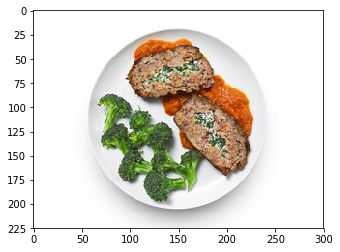

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import imageio

img = imageio.imread('food.jpg')
plt.imshow(img)
data = img.reshape(img.shape[0]*img.shape[1],3)
img.shape

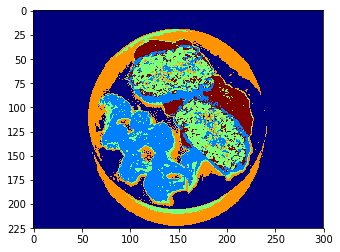

In [11]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=5,random_state=1)
k_means.fit(data) 
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

img_clusters = labels.reshape(img.shape[0],img.shape[1])
plt.imshow(img_clusters,cmap='jet')

In [12]:
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

img2 = rescale(img, 1.0 / 4.0)
data2 = img2.reshape(img2.shape[0]*img2.shape[1],3)
data2.shape

C:\Users\msi_pc\Anaconda3\lib\site-packages\skimage\transform\_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
C:\Users\msi_pc\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\msi_pc\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(4200, 3)

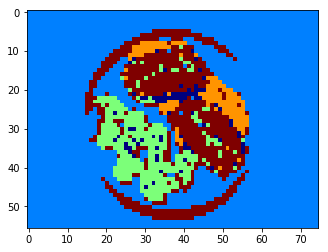

In [13]:
from sklearn import cluster

spectral = cluster.SpectralClustering(n_clusters=5,random_state=1,gamma=2)
spectral.fit(data2) 
labels2 = spectral.labels_

img2_clusters = labels2.reshape(img2.shape[0],img2.shape[1])
plt.imshow(img2_clusters,cmap='jet')